<a href="https://colab.research.google.com/github/kurexi/fml-labs/blob/main/FML_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8
## Sampling from a Gaussian Mixture and Implementing K-Means

In [ ]:
import numpy as np

def genGassianSamples(N, m, C):
  A = np.linalg.cholesky(C)
  U = np.random.randn(N, 2)
  return (U @ A.T + m)

Means = np.array([[0,3],[3,0],[4,4]])

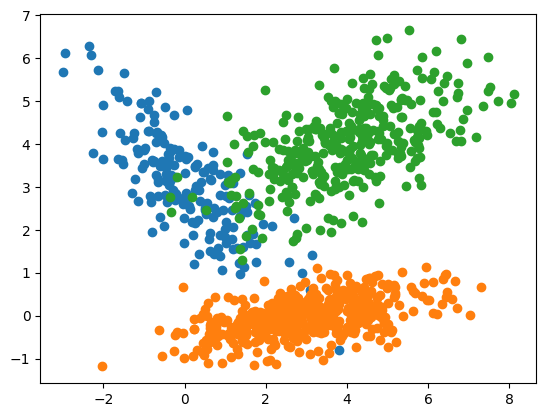

In [ ]:
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt

CovMatrices = np.zeros((3,2,2))

random_states = [41,42,43]
for i in range(3):
  CovMatrices[i,:,:] = make_spd_matrix(2,random_state=random_states[i])

np.random.seed(42)
w = np.random.rand(3)
w = w / np.sum(w)

nData = np.floor(w * 1000).astype(int)

X0 = genGassianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGassianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGassianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])

X = np.append(np.append(X0, X1, axis=0), X2, axis=0)

N = X.shape[0]
y = np.zeros(N)
y[0:X0.shape[0]] = 0
y[X0.shape[0]:X0.shape[0]+X1.shape[0]] = 1
y[X0.shape[0]+X1.shape[0]:] = 2

# plt.scatter(X0[:, 0], X0[:, 1], c='r', marker='o', label="Class 0")
# plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='x', label="Class 1")
# plt.scatter(X2[:, 0], X2[:, 1], c='g', marker='^', label="Class 2")

def plot(plt, X, y, k):
  for i in range(k):
    subset = X[y == i]
    plt.scatter(subset[:, 0], subset[:, 1])

plot(plt, X, y, 3)



4.962300340071075


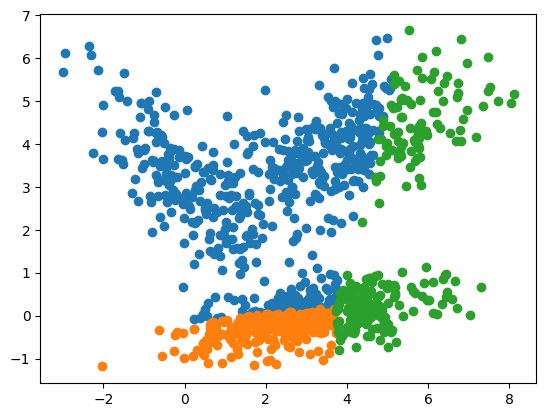

2.010330615475012


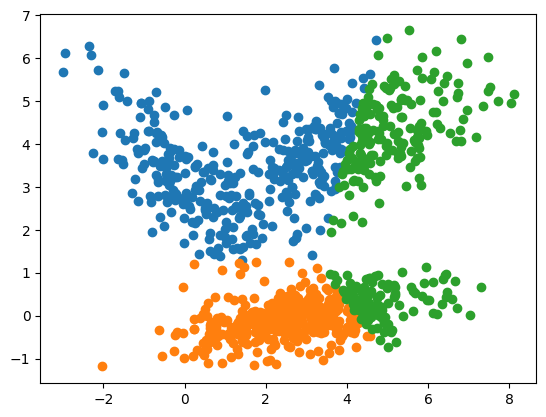

1.7853296226031845


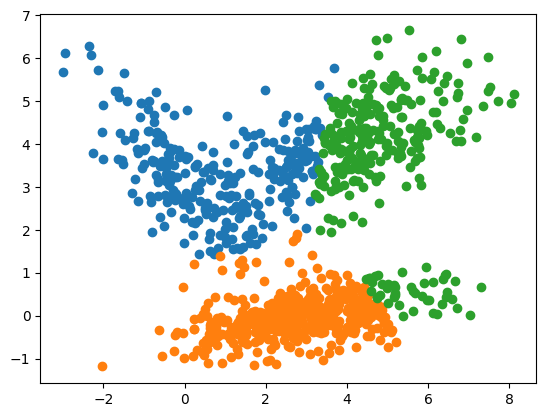

0.9055765231206391


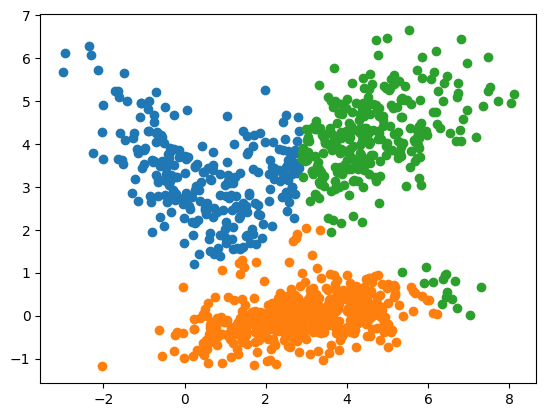

0.3600508128164388


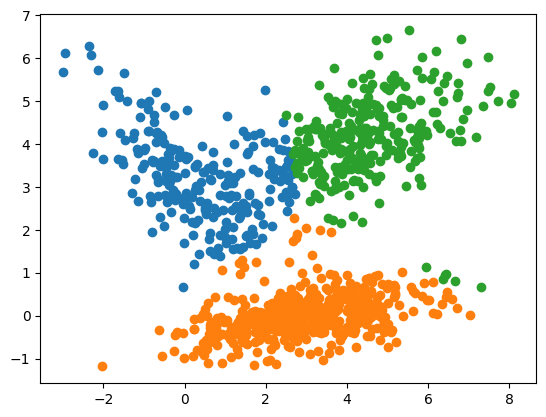

0.22712972434846374


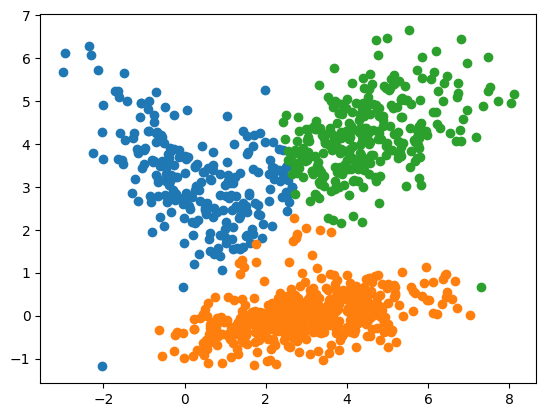

0.12264948496383374


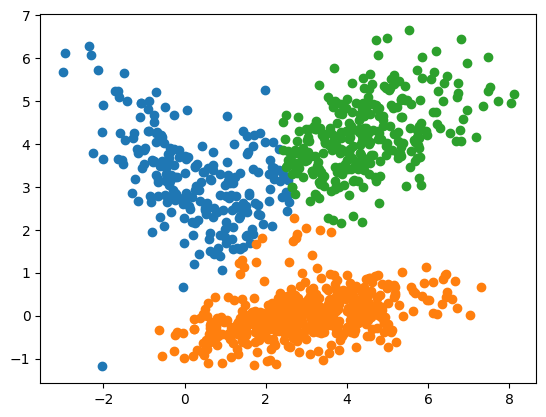

0.017293781822285956


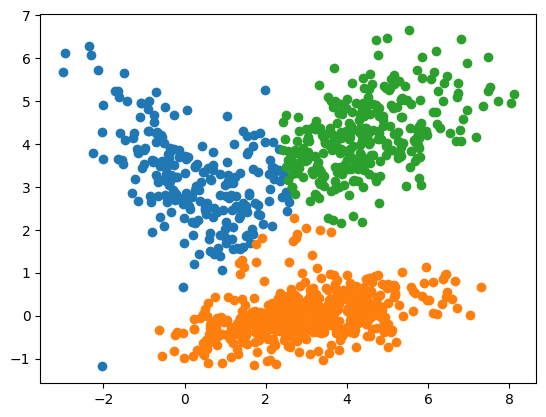

0.0


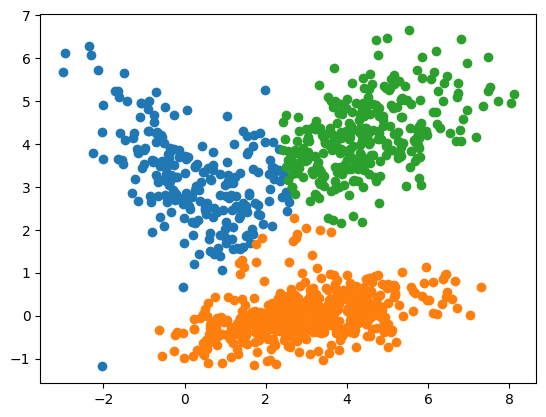

In [ ]:
# K-Means

from random import randint

k = 3

start_i = randint(0, N - k)
centers = X[start_i:start_i + k, :]

assignments = np.zeros(N)
margin = 1e-5

while True:
  # assgin to cluster
  for i in range(N):
    x = X[i,:]
    nearest = np.inf
    for j in range(k):
      center = centers[j,:]
      dist = np.linalg.norm(x - center)
      if dist < nearest:
        nearest = dist
        assignments[i] = j

  new_centers = np.zeros((k, 2))
  # update centers
  for i in range(k):
    members = X[assignments == i]
    new_centers[i,:] = members.mean(axis=0)


  diff = 0
  for i in range(k):
    diff += np.linalg.norm(new_centers[i] - centers[i])

  print(diff)
  plot(plt, X, assignments, k)
  plt.show()

  if diff > margin:
    centers = new_centers
    continue

  break



## Visualising Gaussian Density Countours

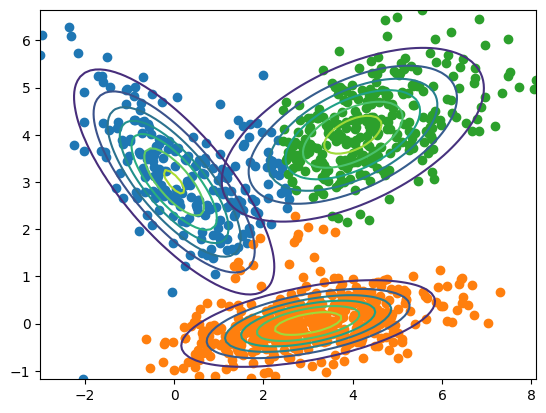

In [ ]:
from scipy.stats import multivariate_normal

def plot_multivariate_normal(plt, normal, X):
  x_vec = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
  y_vec = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
  X_plt, Y_plt = np.meshgrid(x_vec, y_vec)

  grid_points = np.c_[X_plt.ravel(), Y_plt.ravel()]

  Z_plt = normal.pdf(grid_points)
  Z_plt = Z_plt.reshape(X_plt.shape)
  plt.contour(X_plt, Y_plt, Z_plt)

plot(plt, X, assignments, k)
for i in range(3):
  normal = multivariate_normal(Means[i], CovMatrices[i])
  plot_multivariate_normal(plt, normal, X)



## Comarision with sklearn

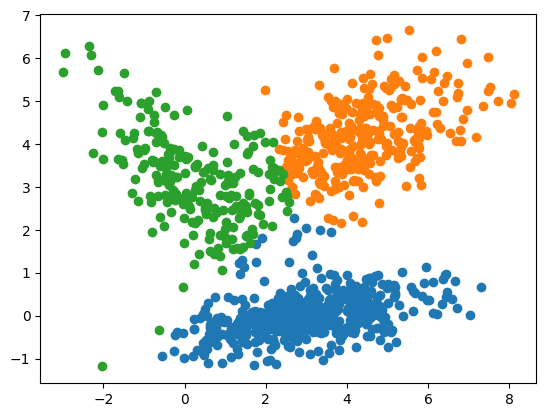

In [ ]:
from sklearn.cluster import KMeans

k = 3

kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
kmeans.fit(X)

plot(plt, X, kmeans.labels_, k)

## Sensitivity Analysis

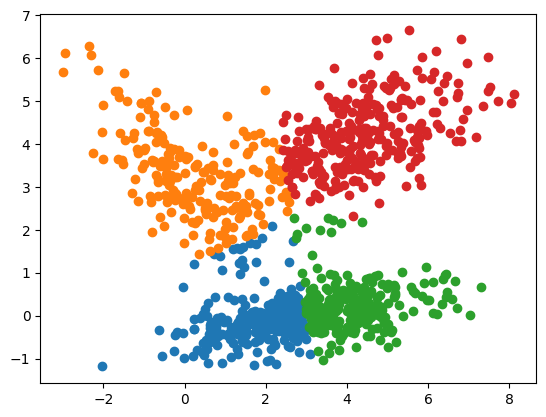

In [ ]:
kk = 4
kmeans = KMeans(n_clusters=kk, n_init=1)
kmeans.fit(X)

plot(plt, X, kmeans.labels_, kk)

## Application to a Real Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score

iris = load_iris()

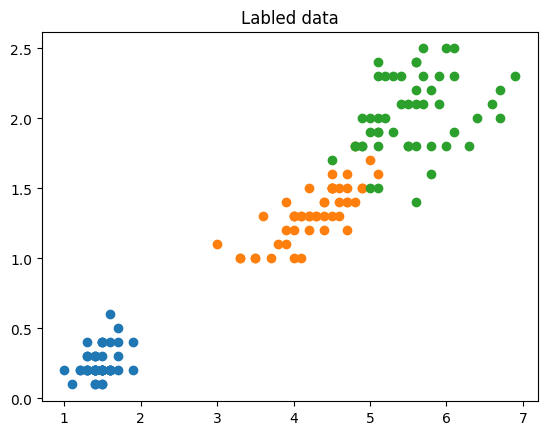

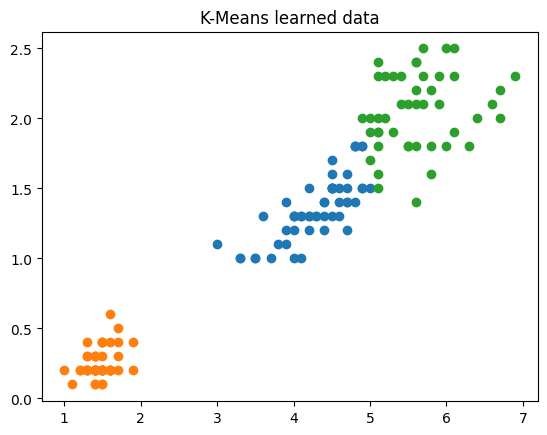

0.8509627406851713

In [ ]:
X_iris, y_iris = iris.data[:,[2, 3]], iris.target
kmeans_iris = KMeans(n_clusters=3, n_init='auto')
kmeans_iris.fit(X_iris)

# Labled data
plot(plt, X_iris, y_iris, 3)
plt.title("Labled data")
plt.show()

# K-Means learned data
plot(plt, X_iris, kmeans_iris.labels_, 3)
plt.title("K-Means learned data")
plt.show()

adjusted_rand_score(y_iris, kmeans_iris.labels_)

## Gaussian Mixture Model Fitting

accuracy: 0.9210143972085257
GMM weights: [0.19689105 0.34351667 0.45959228]
Original weights: [0.18205878 0.35581214 0.46212909]
GMM Means: [[ 2.98698087 -0.01256446]
 [ 4.07626498  4.03108747]
 [ 0.13800542  3.04264043]]
Original Means: [[0 3]
 [3 0]
 [4 4]]
GMM Cov: [[[ 2.27045542  0.35132924]
  [ 0.35132924  0.19702867]]

 [[ 2.14815357  0.75398441]
  [ 0.75398441  0.84973293]]

 [[ 1.41269587 -1.06276996]
  [-1.06276996  1.38869389]]]
Original Cov: [[[ 1.27602427 -1.02582829]
  [-1.02582829  1.44426512]]

 [[ 2.09417602  0.34617642]
  [ 0.34617642  0.21783715]]

 [[ 2.28664883  0.76798353]
  [ 0.76798353  0.89962772]]]


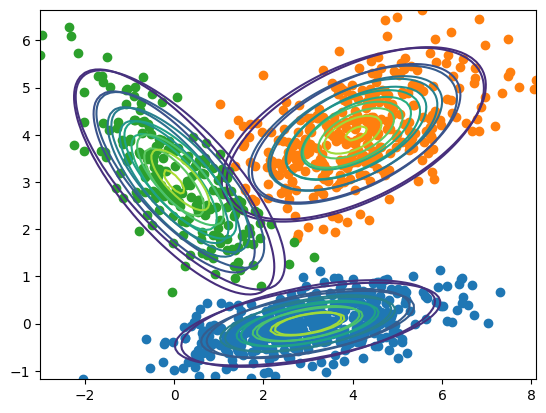

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
pred = gmm.predict(X)

plot(plt, X, pred, k)
for i in range(3):
  normal = multivariate_normal(Means[i], CovMatrices[i])
  plot_multivariate_normal(plt, normal, X)

for i in range(3):
  learned_normal = multivariate_normal(gmm.means_[i], gmm.covariances_[i])
  plot_multivariate_normal(plt, learned_normal, X)


print(f"accuracy: {adjusted_rand_score(y, pred)}")
print("=========")
print(f"GMM weights: {np.sort(gmm.weights_)}")
print(f"Original weights: {np.sort(w)}")
print(f"GMM Means: {gmm.means_}")
print(f"Original Means: {Means}")
print(f"GMM Cov: {gmm.covariances_}")
print(f"Original Cov: {CovMatrices}")






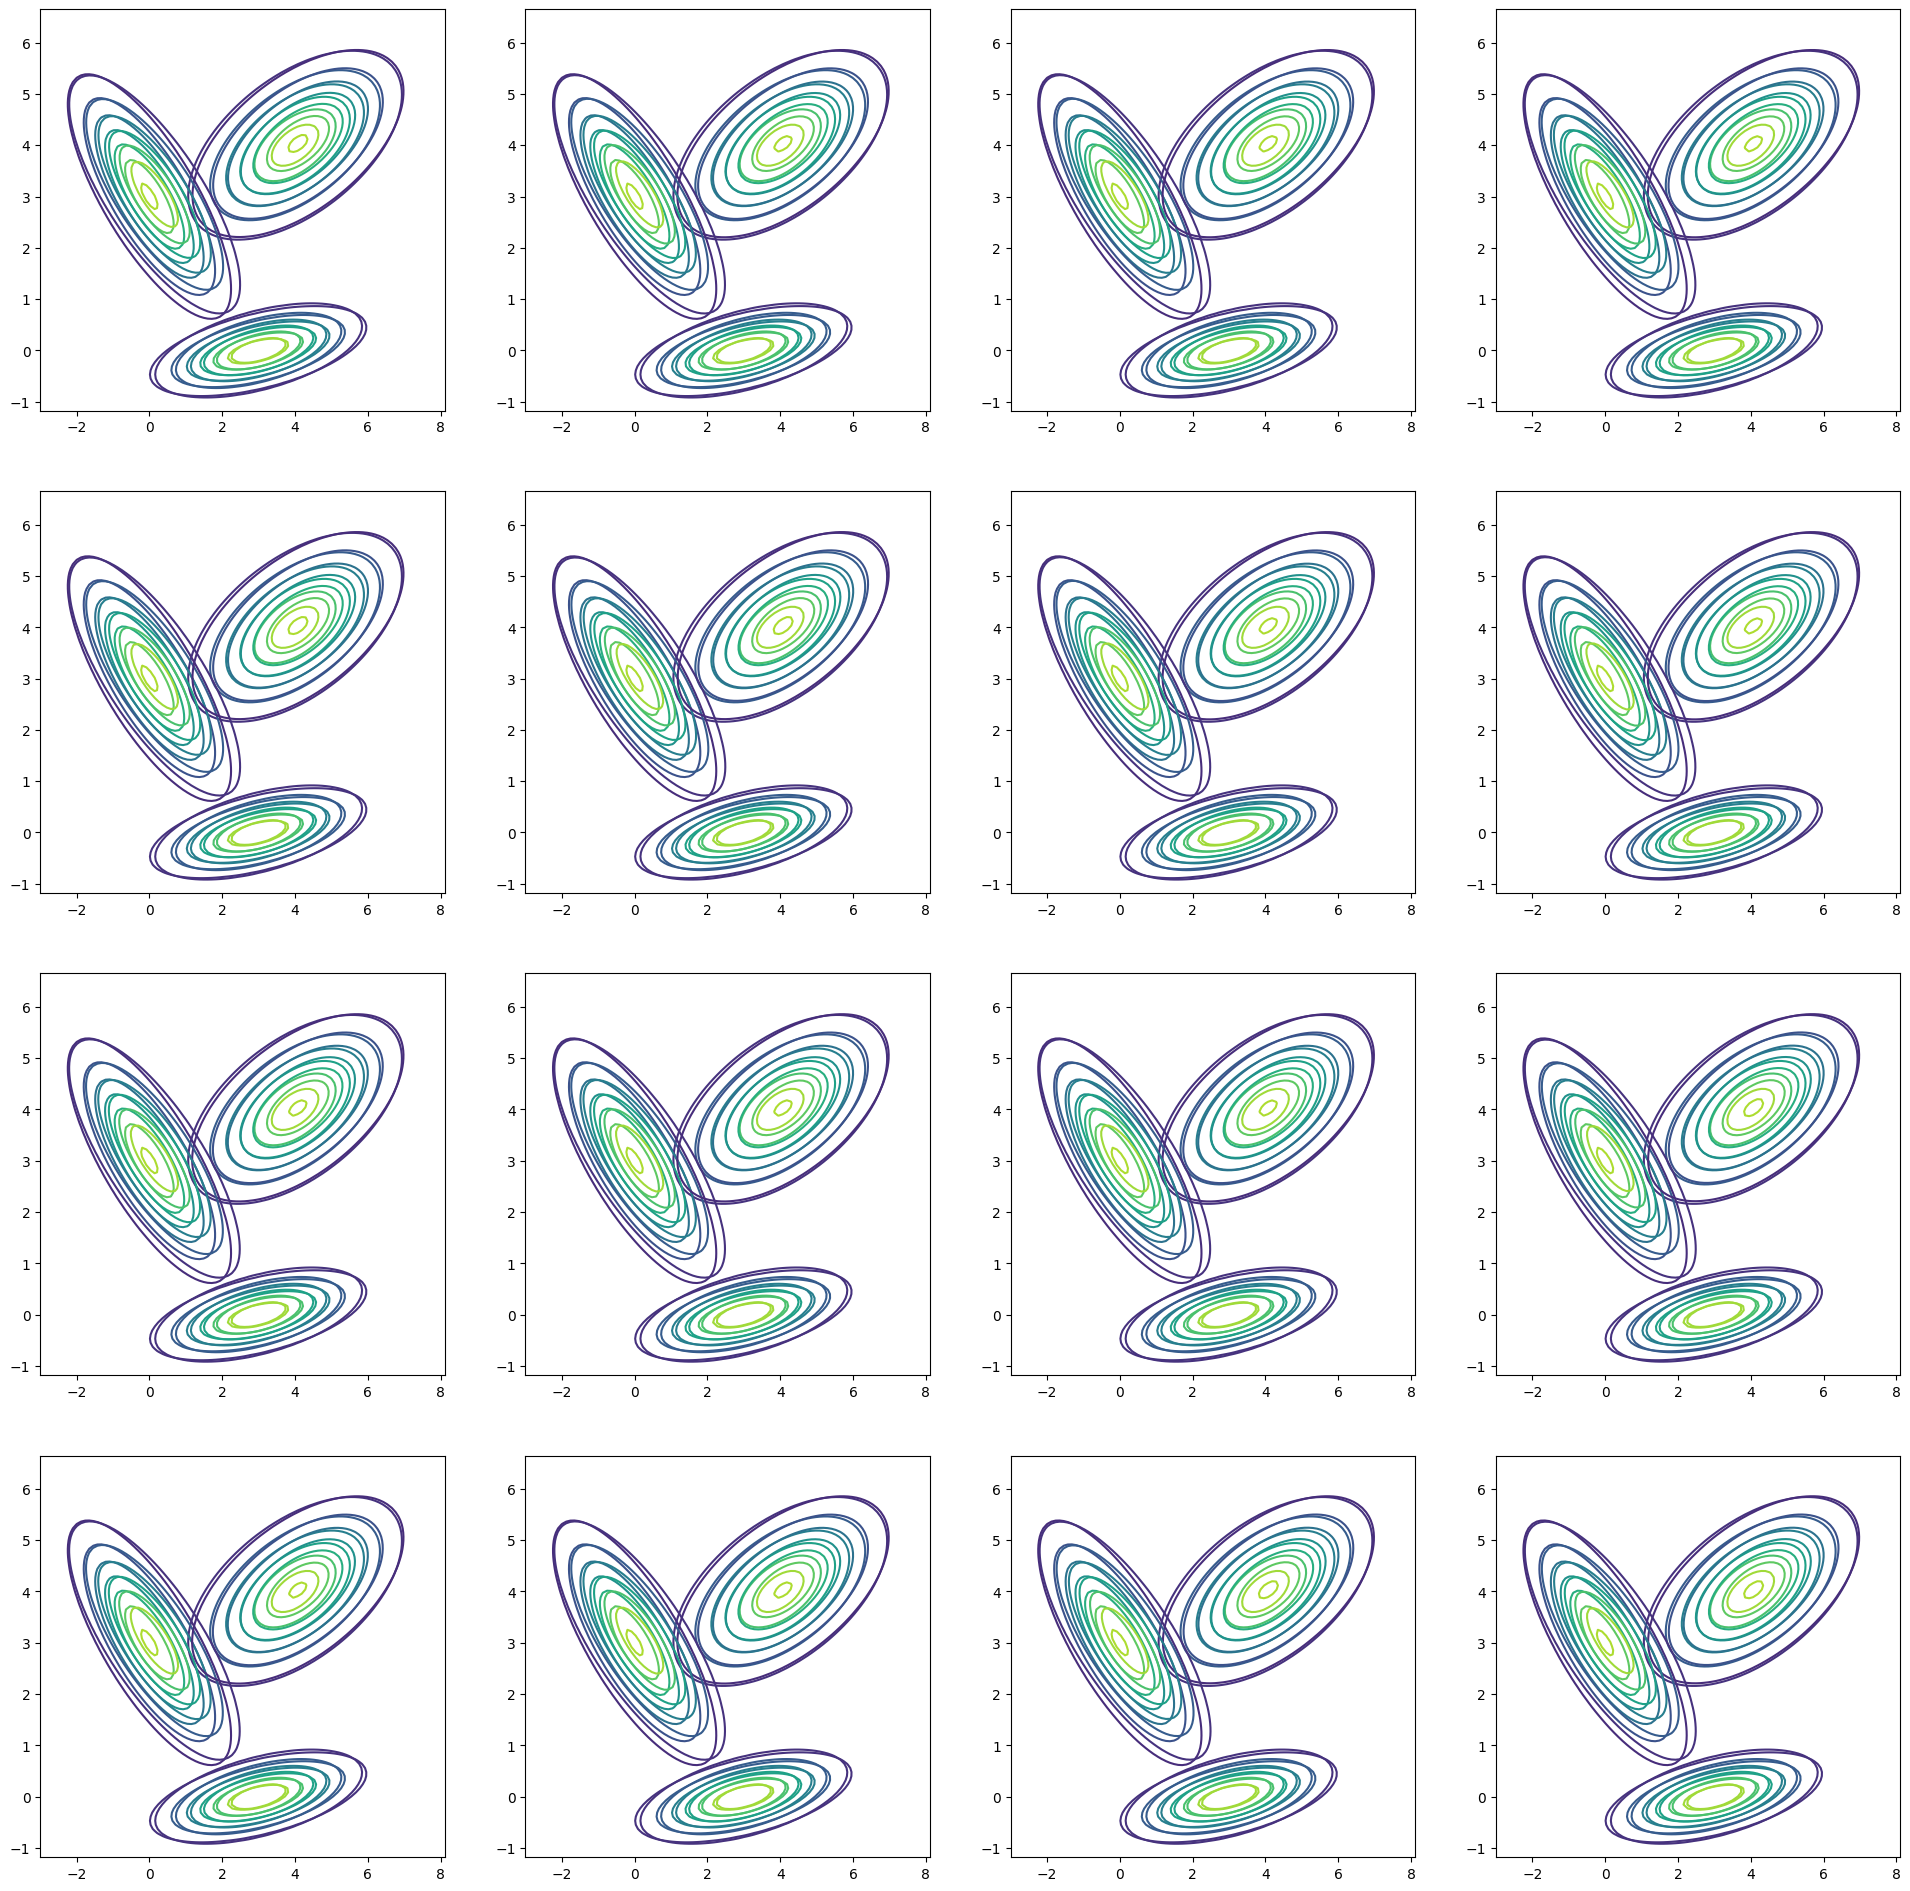

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(24,24))

for i in range(16):
  gmm_n = GaussianMixture(n_components=3, random_state=i)
  gmm_n.fit(X)

  for j in range(3):
    normal = multivariate_normal(Means[j], CovMatrices[j])
    plot_multivariate_normal(ax[int(i/4), i%4], normal, X)

  for j in range(3):
    learned_normal = multivariate_normal(gmm_n.means_[j], gmm_n.covariances_[j])
    plot_multivariate_normal(ax[int(i/4), i%4], learned_normal, X)
